# Pacotes

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Top Spotify de 2010 à 2019 (por ano)

*créditos*: **https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year** 

### Objetivos:  

Apresentar ferramentas para uma análise exploratória inicial e uma estratégia para a tunagem de hiperparâmetros de um modelo Random Forest para classificação


### Sobre os dados:

A base apresenta dados sobre as melhores músicas do Ano no mundo, com 203 registros e 13 variáveis que serão exploradas.

### 1. Carregando e observando nossos dados

In [2]:
dados = pd.read_csv('top10s.csv', encoding='latin-1')

In [3]:
dados.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## DICIONÁRIO DE DADOS

**1. title** - Título da música

**2. top genre** - Gênero

**3. year** - Ano da música na Billboard

**4. bpm** - Beats.Per.Minute - O andamento da música.

**5. nrgy - Energy**- A energia do som, quanto maior, mais energia 

**6. dnce - Danceability** - Quanto maior o valor, mais fácil é a música para se dançar

**7. dB - Loudness..dB..** - Quanto maior o valor mais alta é a música

**8. live - Liveness** - Quanto mais alto, mais provável de que a música tenha sido gravada ao vivo

**9. val - Valence** - Quanto maior o valor mais positivo é o clima da música

**10. dur - Length** - Duração em segundos

**11. acous - Acousticness..** - Quanto maior o valor, mais acústica é a música

**12. spch - Speechiness** - Quanto maior o valor, mais palavras a música possui

**13. pop - Popularity**- Quanto maior, mais popular é o som..

In [4]:
dados  = dados.drop(columns=['Unnamed: 0'])

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


### 2. Análise descritiva

Vamos analisar o comportamento de algumas das variáveis disponíveis, possíveis correlações e comportamentos na nossa base. Utilizaremos as bibliotecas *matplotlib*, *pandas* e *seaborn*.

#### 2.1 Sobre os gêneros:

Text(0, 0.5, 'Gênero')

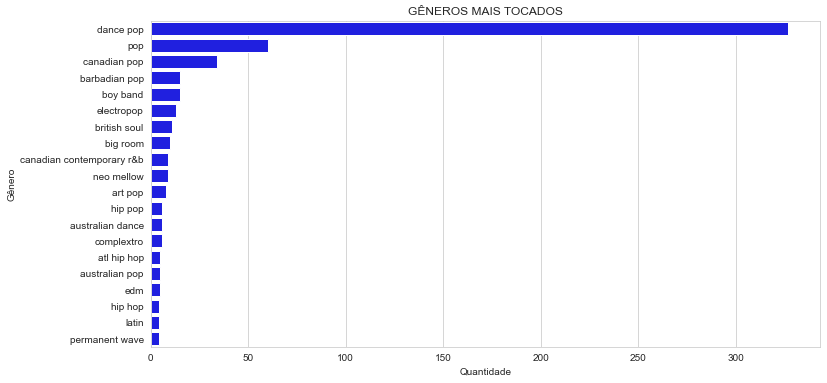

In [6]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(y='top genre', data=dados, order = dados['top genre'].value_counts()[:20].index, color='blue').set_title('GÊNEROS MAIS TOCADOS')
plt.xlabel('Quantidade')
plt.ylabel("Gênero")

*dance pop* é disparado o gênero mais tocado nesse período.

#### 2.2 Sobre os artistas

Text(0, 0.5, 'Artista')

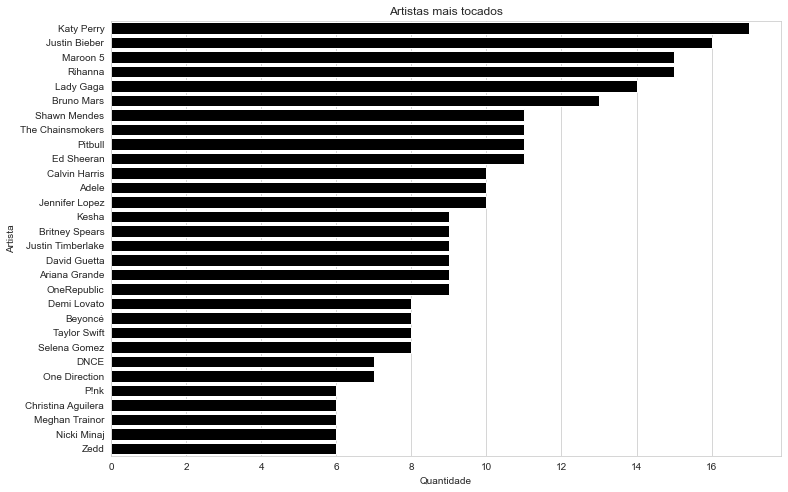

In [7]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(data = dados, y = 'artist', order = dados.artist.value_counts()[:30].index, color='black').set_title("Artistas mais tocados")
plt.xlabel('Quantidade')
plt.ylabel('Artista')

No top 3 dos spotify temos: *Kate Perry*, *Justin Bieber* e *Rihanna*. 

#### 2.3 Sobre o BPM

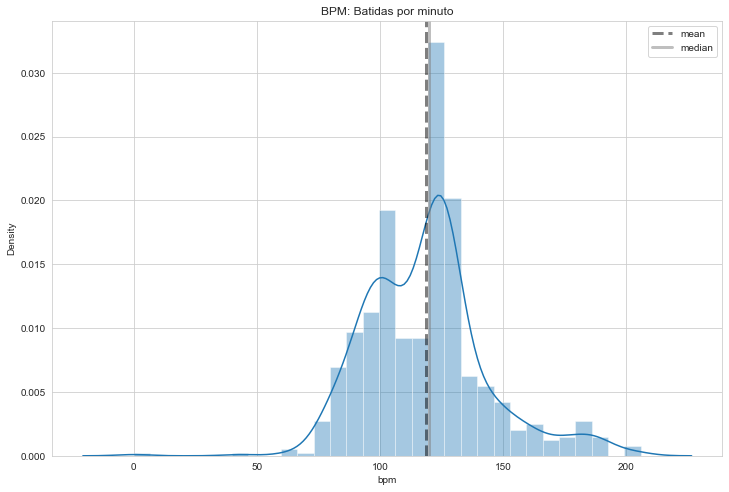

In [8]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (12,8))
mean = dados.bpm.mean()
median = dados.bpm.median()
ax = sns.distplot(dados.bpm).set_title('BPM: Batidas por minuto')
plt.axvline(x=mean, linewidth=3, color='black', label="mean", alpha=0.5,linestyle='--')
plt.axvline(x=median, linewidth=3, color='grey', label="median", alpha=0.5)
plt.legend()

A média e a mediana da variável *bpm* estão muito próximas.

Vamos analisar os 5 gêneros mais tocados:

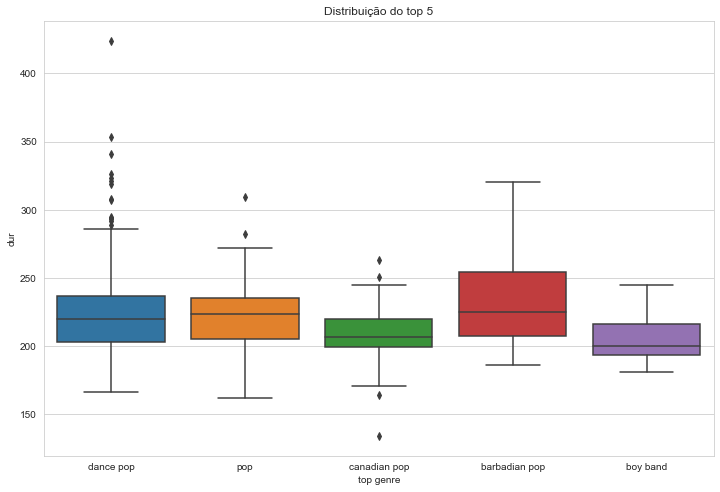

In [9]:
sns.set_style("whitegrid")
generos_mais_tocados = dados.loc[dados['top genre'].isin(['dance pop', 'pop', 'canadian pop', 'barbadian pop', 'boy band'])]
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(y = generos_mais_tocados['dur'], x=generos_mais_tocados['top genre']).set_title("Distribuição do top 5")


Em relação a variável *dur* podemos perceber que a distribuição de *dance pop* é relativamente equilibrada, embora apresente alguns outliers. O mesmo acontece para os demais gêneros analisados que, embora  apresentem diferenças, mostram-se com valores bem próximos conforme observamos nos box-plots.

#### 2.4 Sobre a influência do ano.

<AxesSubplot:>

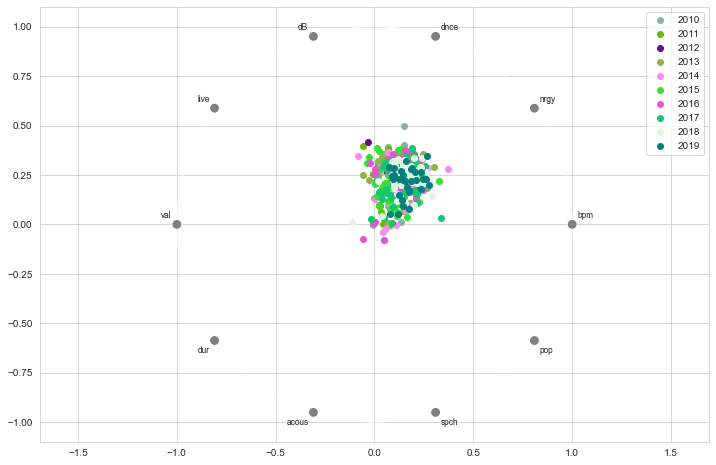

In [10]:
sns.set_style("whitegrid")
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12,8))
new_data = dados.select_dtypes('int64')

radviz(new_data, str('year'), ax=ax)

De uma forma geral, não há nenhuma variável que, visualmente, demonstre um maior impacto quando comparada ao ano de lançamento da música.

####  2.5 Analisando as demais variáveis



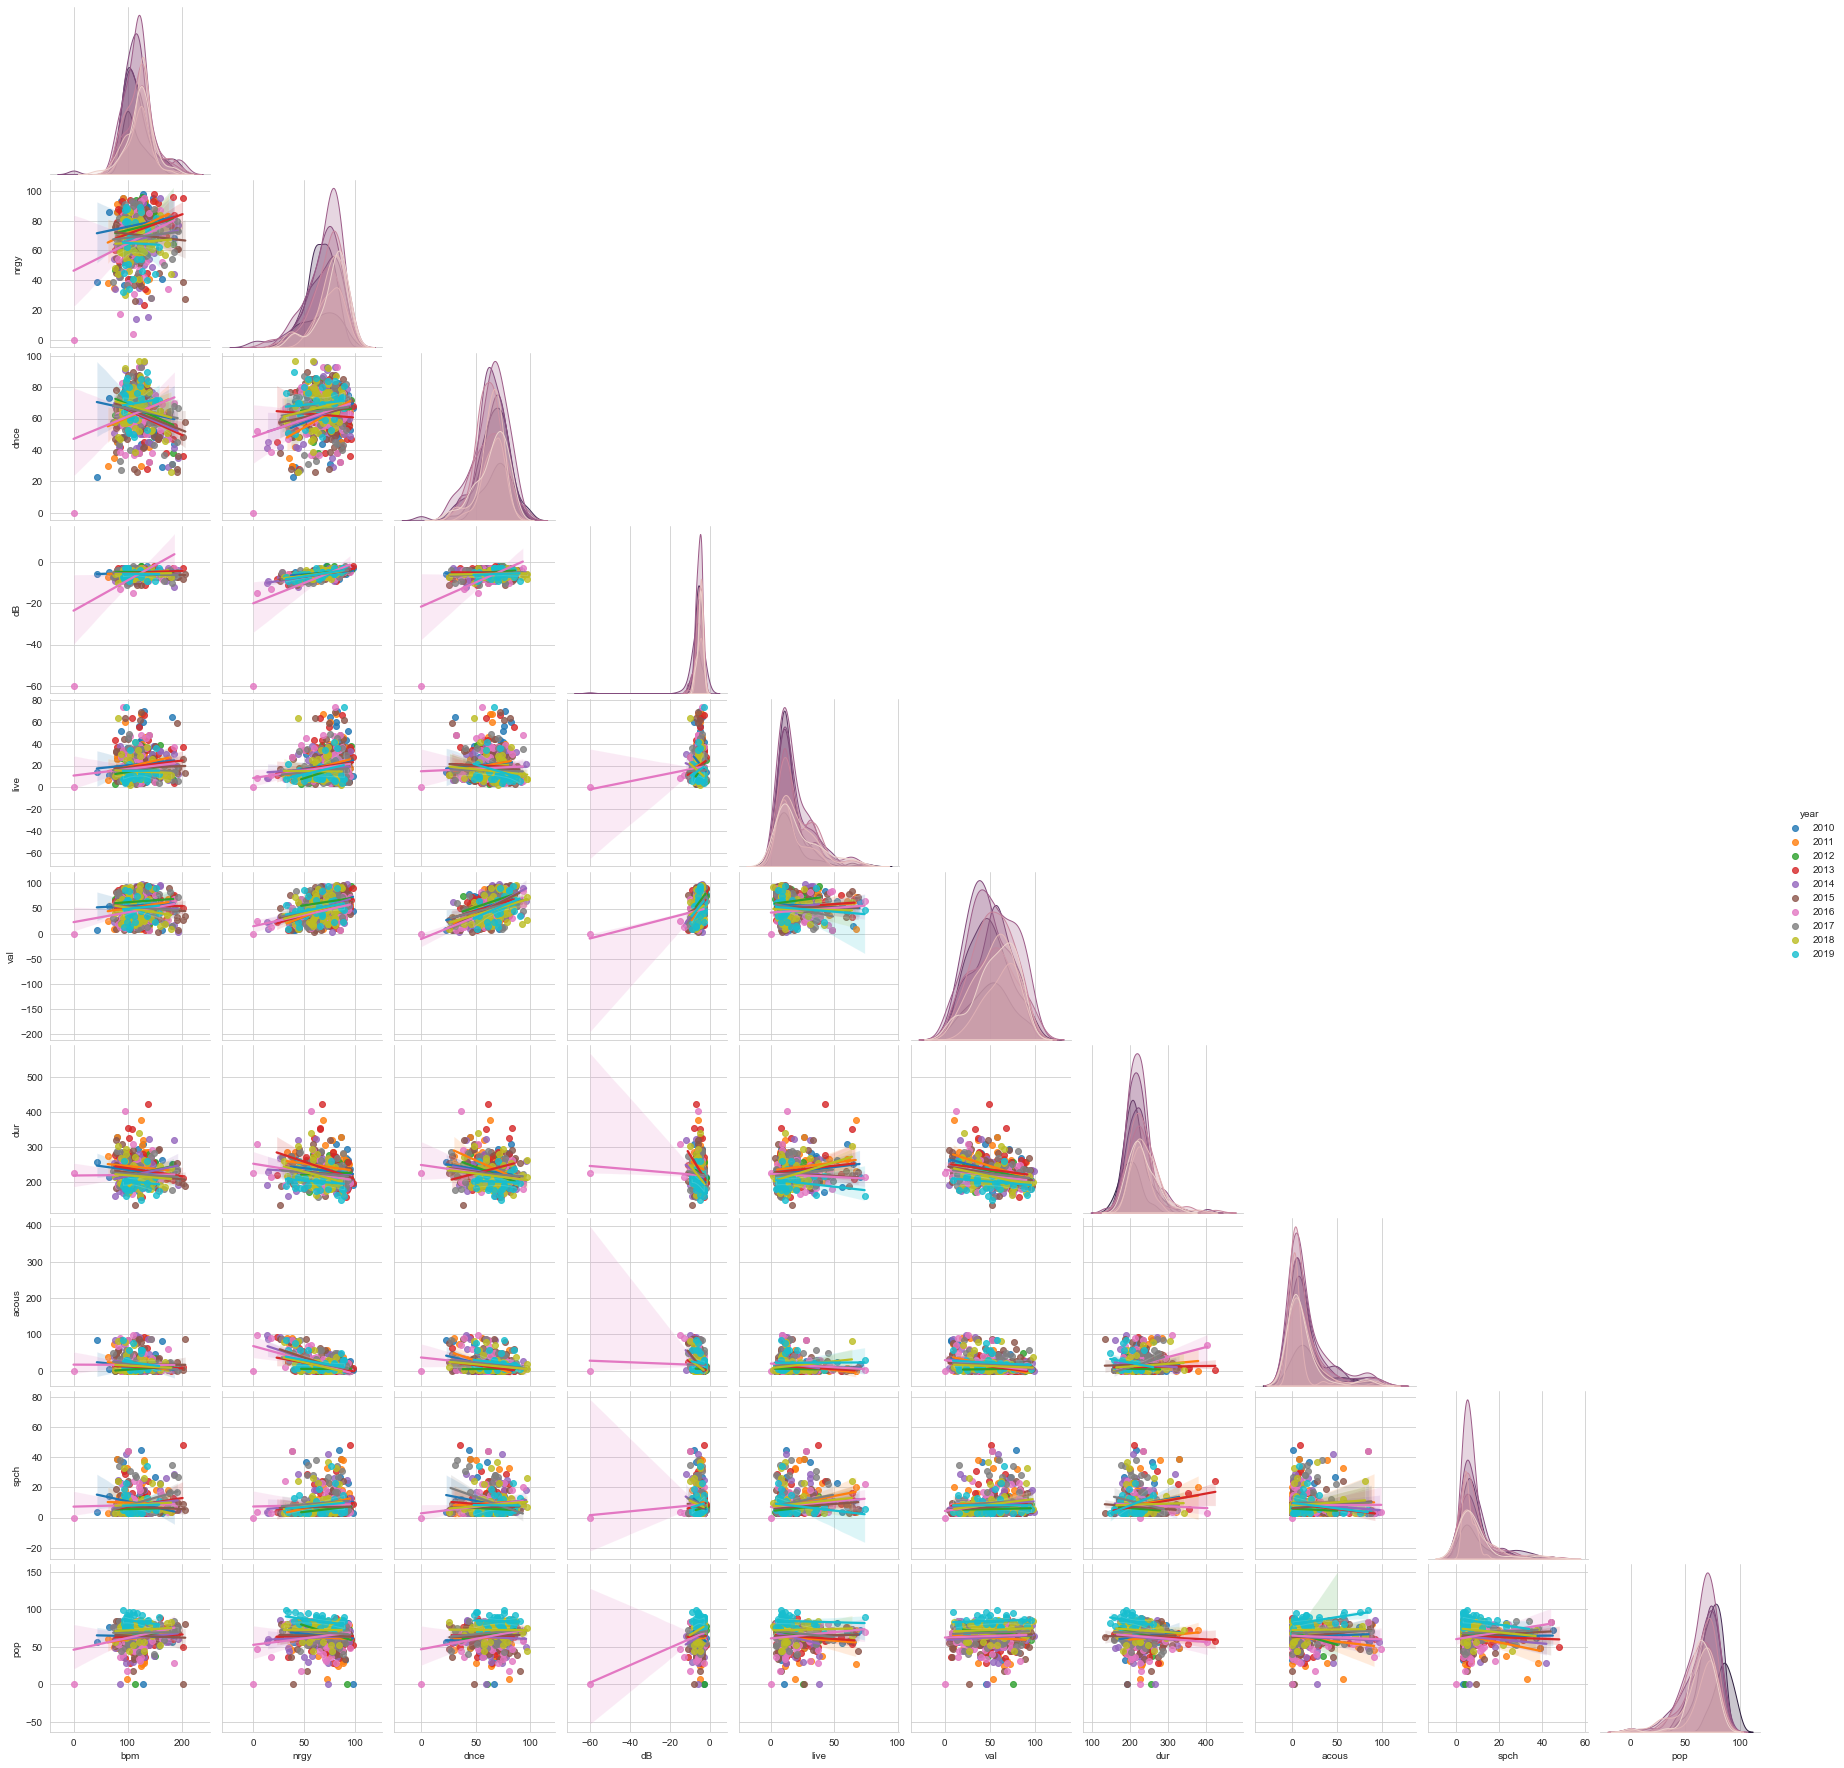

In [11]:
sns.set_style("whitegrid")
new_data = dados.drop(0)
sns.pairplot(new_data, hue='year', corner=True, kind='reg')

#### 2.6 Analisando a correlação entre as variáveis




In [12]:
dados_corr = dados.select_dtypes('int64')

In [13]:
dados_corr.corr()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,1.000000,-0.104247,-0.225596,0.079269,-0.126471,-0.136331,-0.122025,-0.215344,0.101725,0.004778,0.241261
bpm,-0.104247,1.000000,0.126170,-0.131301,0.183870,0.081579,0.016021,-0.029359,-0.113257,0.058999,0.018983
nrgy,-0.225596,0.126170,1.000000,0.167209,0.537528,0.186738,0.409577,-0.143610,-0.562287,0.107313,-0.057645
dnce,0.079269,-0.131301,0.167209,1.000000,0.233170,-0.028801,0.501696,-0.176841,-0.240064,-0.028041,0.116054
dB,-0.126471,0.183870,0.537528,0.233170,1.000000,0.081934,0.282922,-0.104723,-0.190401,-0.001110,0.156897
live,-0.136331,0.081579,0.186738,-0.028801,0.081934,1.000000,0.020226,0.098339,-0.098167,0.144103,-0.075749
val,-0.122025,0.016021,0.409577,0.501696,0.282922,0.020226,1.000000,-0.262256,-0.249038,0.122013,0.038953
dur,-0.215344,-0.029359,-0.143610,-0.176841,-0.104723,0.098339,-0.262256,1.000000,0.091802,0.054564,-0.104363
acous,0.101725,-0.113257,-0.562287,-0.240064,-0.190401,-0.098167,-0.249038,0.091802,1.000000,0.002763,0.026704
spch,0.004778,0.058999,0.107313,-0.028041,-0.001110,0.144103,0.122013,0.054564,0.002763,1.000000,-0.041490


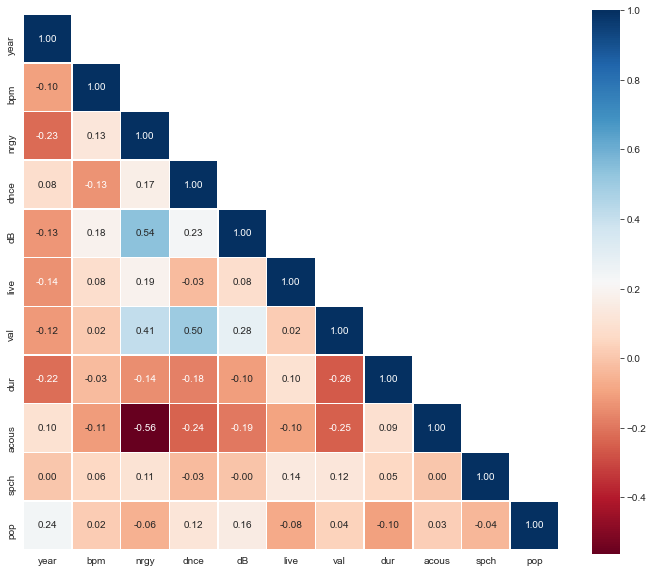

In [14]:

def plot_corr(corr):
    fig,ax = plt.subplots(figsize=(12,10))
    # Cortaremos a metade de cima pois é o espelho da metade de baixo
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True
    sns.heatmap(corr, mask=mask, cmap='RdBu', square=True, linewidths=.5,fmt=".2f",annot = True)
# Calculando a correlação
corr = dados_corr.corr()
plot_corr(corr)


As variáveis **acous** e **nrgy** apresentaram um coeficiente de correlação igual a $-0.56$. Vamos analisar o comportamento dessas duas variáveis isoladamente.

Text(0.5, 1.0, 'Dispersão')

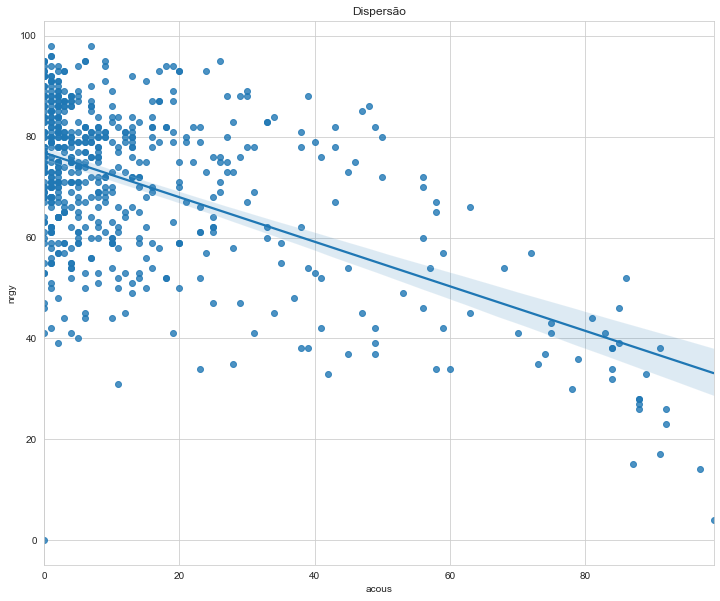

In [15]:
fig,ax = plt.subplots(figsize=(12,10))
sns.regplot(data=dados, x='acous', y='nrgy').set_title("Dispersão")

### 3. Modelo de previsão para o gênero 

Construiremos um modelo de classificação sendo nossa variável alvo **top genre**. Utilizaremos a biblioteca *sklearn* para testar alguns algoritmos.


#### 3.1 Carregando as bibliotecas

## Pacotes

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import (LogisticRegression,)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import (KNeighborsClassifier,)
from sklearn.naive_bayes import (GaussianNB)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier,)
import janitor as jn
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score


#### 3.2 Selecionando as variáveis de interesse

Serão desconsideradas as variáveis *year* e *title*

In [17]:
# selecionando as variáveis de interesse
dados_2 = dados.drop(columns=['year', 'title', 'artist'])

#one hot encoder
categoricas = dados.artist
categoricas_dummies = pd.get_dummies(categoricas, drop_first=True)

#agrupando
dados_model = pd.concat([dados_2, categoricas_dummies], axis=1)
dados_model.head()


,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,...,Train,Troye Sivan,Usher,Wiz Khalifa,Years & Years,ZAYN,Zara Larsson,Zedd,fun.,will.i.am
0,neo mellow,97,89,67,-4,8,80,217,19,4,...,1,0,0,0,0,0,0,0,0,0
1,detroit hip hop,87,93,75,-5,52,64,263,24,23,...,0,0,0,0,0,0,0,0,0,0
2,dance pop,120,84,76,-3,29,71,200,10,14,...,0,0,0,0,0,0,0,0,0,0
3,dance pop,119,92,70,-4,8,71,295,0,4,...,0,0,0,0,0,0,0,0,0,0
4,pop,109,84,64,-5,9,43,221,2,4,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dados_model.isnull().mean()

top genre       0.0
bpm             0.0
nrgy            0.0
dnce            0.0
dB              0.0
               ... 
ZAYN            0.0
Zara Larsson    0.0
Zedd            0.0
fun.            0.0
will.i.am       0.0
Length: 194, dtype: float64

Obs: Não há dados faltantes.

#### 3.3 Separando as variáveis preditoras da variável resposta

In [19]:
X, y = jn.get_features_targets(dados_model, target_columns='top genre')
X.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,...,Train,Troye Sivan,Usher,Wiz Khalifa,Years & Years,ZAYN,Zara Larsson,Zedd,fun.,will.i.am
0,97,89,67,-4,8,80,217,19,4,83,...,1,0,0,0,0,0,0,0,0,0
1,87,93,75,-5,52,64,263,24,23,82,...,0,0,0,0,0,0,0,0,0,0
2,120,84,76,-3,29,71,200,10,14,80,...,0,0,0,0,0,0,0,0,0,0
3,119,92,70,-4,8,71,295,0,4,79,...,0,0,0,0,0,0,0,0,0,0
4,109,84,64,-5,9,43,221,2,4,78,...,0,0,0,0,0,0,0,0,0,0


#### 3.5 Testando os modelos

Vamos testar o seguintes modelos: *Classificador Dummy*, *Regressão Logística*, *Árvore de Decisão*, *KNN*, *Naive Bayes*,
    *Suport Vector Machine*, *Random Forest* e o *XGBoost*.

In [20]:
# Testando 
for model in [
    DummyClassifier,
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    SVC,
    RandomForestClassifier,
    xgboost.XGBClassifier]:
    
    cls = model()
    kfold = model_selection.KFold(n_splits=5, random_state=123)
    s = model_selection.cross_val_score(cls, X, y, scoring='accuracy', cv=kfold)
    print(f"{model.__name__:22} Accuracy: "
          f"{s.mean():.3f} STD: {s.std():.2f}"
          )

DummyClassifier        Accuracy: 0.323 STD: 0.05
LogisticRegression     Accuracy: 0.502 STD: 0.04
DecisionTreeClassifier Accuracy: 0.781 STD: 0.04
KNeighborsClassifier   Accuracy: 0.464 STD: 0.05
GaussianNB             Accuracy: 0.778 STD: 0.04
SVC                    Accuracy: 0.542 STD: 0.04
RandomForestClassifier Accuracy: 0.769 STD: 0.04
[08:48:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:05] WARNING: C:/Users/Admini

De todos os modelos testados, vemos que o Random Forest foi o que apresentou melhor acurácia.

### 4. Construindo um modelo Random Forest


**Passo 1**: Dividindo os dados em treino e teste

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Passo 2:** Pré-processamento dos dados.



In [22]:
#pre-processamento dos dados
scaler = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

**Passo 3**: construção do grid para os hiperparâmetros

Definiremos quais serão os hiperparâmetros a serem testados, quais valores serão otimizados para a escolha e o fit do modelo. Faremos isso com uma validação cruzada (3 folds)

In [23]:
rf = RandomForestClassifier(random_state=123)
print('Parâmetros:\n')
pprint(rf.get_params())

Parâmetros:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}


In [24]:
n_estimators = list(range(0,200,50))
max_depth = list(range(1,200,50))
min_samples_split = list(range(1,10,1))
min_samples_leaf = list(range(1,10,1))
bootstrap = [True, False]


In [25]:
grid = {'n_estimators':n_estimators,
       'max_depth':max_depth,
       'min_samples_split':min_samples_split,
       'min_samples_leaf':min_samples_leaf,
       'bootstrap':bootstrap}
grid

{'n_estimators': [0, 50, 100, 150],
 'max_depth': [1, 51, 101, 151],
 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'bootstrap': [True, False]}

In [26]:
rf_random = GridSearchCV(estimator=rf, param_grid=grid, cv=3, verbose=1, n_jobs=-1) 
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 7776 out of 7776 | elapsed:  4.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 51, 101, 151],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [0, 50, 100, 150]},
             verbose=1)

**Passo 4:** Visualizando os melhores hiperparâmetros.

In [27]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 51,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 150}

 **Passo 5:** Selecionando os melhores hiperparâmetros e fazendo a comparação.
 
 Vamos comparar um modelos básico (utilizando o default dos hiperparâmetros) com o modelo gerado pela busca de hiperparâmetros e analisar as métricas de resultados.

In [28]:
def avalicao_modelo(modelo, X, y):
    predicao = modelo.predict(X)
    acuracia = accuracy_score(y, predicao)
    print('Analisando a performance:')
    print('Acurácia =  {:2f}%.'.format(acuracia))
   

In [29]:
modelo_simples = RandomForestClassifier(n_estimators=30, random_state = 123)
modelo_simples.fit(X_train, y_train)
acuracia_modelo_simples = avalicao_modelo(modelo_simples, X_test, y_test)

Analisando a performance:
Acurácia =  0.828729%.


In [30]:
modelo_grid = rf_random.best_estimator_
modelo_grid

RandomForestClassifier(bootstrap=False, max_depth=51, min_samples_split=8,
                       n_estimators=150, random_state=123)

In [31]:
acuracia_modelo_grid = avalicao_modelo(modelo_grid, X_test, y_test)

Analisando a performance:
Acurácia =  0.845304%.


In [32]:
y_pred = modelo_grid.predict(X_test)
y_unique = y_test.unique()
mcm = multilabel_confusion_matrix(y_test, y_pred, labels = y_unique)
mcm

array([[[173,   0],
        [  1,   7]],

       [[180,   0],
        [  0,   1]],

       [[ 56,  28],
        [  0,  97]],

       [[179,   0],
        [  0,   2]],

       [[178,   0],
        [  0,   3]],

       [[178,   0],
        [  0,   3]],

       [[162,   0],
        [  2,  17]],

       [[180,   0],
        [  1,   0]],

       [[180,   0],
        [  1,   0]],

       [[178,   0],
        [  1,   2]],

       [[178,   0],
        [  2,   1]],

       [[180,   0],
        [  0,   1]],

       [[177,   0],
        [  0,   4]],

       [[178,   0],
        [  3,   0]],

       [[174,   0],
        [  0,   7]],

       [[175,   0],
        [  4,   2]],

       [[180,   0],
        [  1,   0]],

       [[179,   0],
        [  2,   0]],

       [[179,   0],
        [  0,   2]],

       [[178,   0],
        [  2,   1]],

       [[179,   0],
        [  2,   0]],

       [[180,   0],
        [  0,   1]],

       [[180,   0],
        [  1,   0]],

       [[180,   0],
        [  1, 

### 5. CONCLUSÃO

Podemos perceber uma melhora na acurácia do modelo onde utilizou-se a tunagem. A tunagem dos hiperparâmtros permite uma melhor escolha para a combinação das variáveis que controlam o processo de treinamento. Na maior parte dos casos conseguiremos encontrar a melhor combinação possível para o algoritmo selecionado com os dados disponíveis obtendo assim ganho de performance.